# Analyse des données d'expérience

Expérience: J7 Energie Solaire

Date: 2023-09-30

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Save figs for latex
import matplotlib as mpl
import tikzplotlib as tikz
from options import *

## Expérience 2: Puissance max

### Amorphe

In [3]:
amorphed40 = np.loadtxt("../data/Ir(Ud),amorphe,d=40cm.csv", delimiter=",", skiprows=1, dtype=float)
amorphed70 = np.loadtxt("../data/Ir(Ud),amorphe,d=70cm.csv", delimiter=",", skiprows=1, dtype=float)

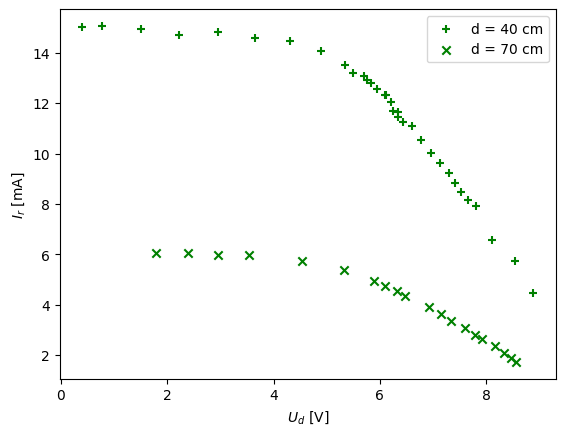

In [4]:
plt.scatter(amorphed40[:,1], amorphed40[:,2], marker="+", color=colors["A"], label="d = 40 cm")
plt.scatter(amorphed70[:,1], amorphed70[:,2], marker="x", color=colors["A"], label="d = 70 cm")
plt.legend()
# plt.title("$I_r(U_d)$, Cellule Amorphe")
plt.xlabel("$U_d$ [V]")
plt.ylabel("$I_r$ [mA]")
tikz.save("../plots/amorpheI(U).tikz")

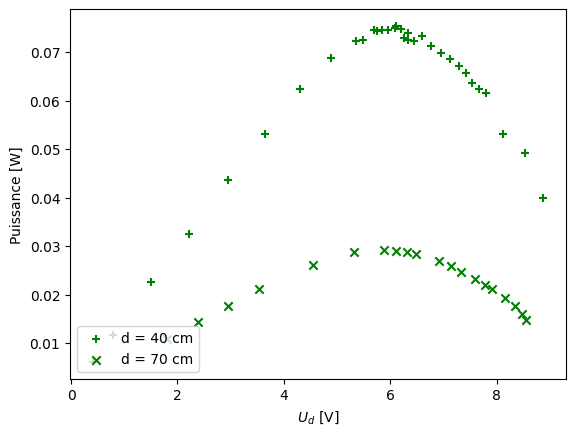

In [5]:
# Puissances
# [W] = [V] * [A]
puis_amorphed40 = amorphed40[:,1] * amorphed40[:,2] * 1e-3
puis_amorphed70 = amorphed70[:,1] * amorphed70[:,2] * 1e-3

plt.scatter(amorphed40[:,1], puis_amorphed40, marker="+", color=colors["A"], label="d = 40 cm")
plt.scatter(amorphed70[:,1], puis_amorphed70, marker="x", color=colors["A"], label="d = 70 cm")
plt.legend(loc='lower left')
# plt.title("$P(U_d)$, amorphe")
plt.xlabel("$U_d$ [V]")
plt.ylabel("Puissance [W]")
tikz.save("../plots/amorpheP(U).tikz")

### Monocristallin

### Polycristallin

In [6]:
monod40 = np.loadtxt("../data/Ir(Ud),monocristallin,d=40cm.csv", delimiter=",", skiprows=1, dtype=float)
monod70 = np.loadtxt("../data/Ir(Ud),monocristallin,d=70cm.csv", delimiter=",", skiprows=1, dtype=float)

In [7]:
polyd40 = np.loadtxt("../data/Ir(Ud),polycristallin,d=40cm.csv", delimiter=",", skiprows=1, dtype=float)
polyd70 = np.loadtxt("../data/Ir(Ud),polycristallin,d=70cm.csv", delimiter=",", skiprows=1, dtype=float)

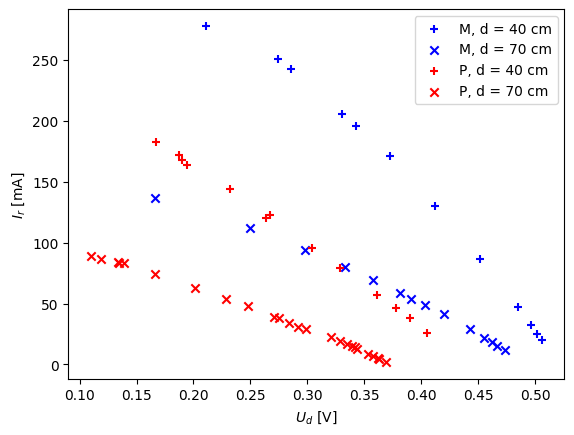

In [8]:
plt.scatter(monod40[:,1], monod40[:,2], marker="+", color=colors["M"], label="M, d = 40 cm")
plt.scatter(monod70[:,1], monod70[:,2], marker="x", color=colors["M"], label="M, d = 70 cm")

plt.scatter(polyd40[:,1], polyd40[:,2], marker='+', color=colors["P"], label="P, d = 40 cm")
plt.scatter(polyd70[:,1], polyd70[:,2], marker='x', color=colors["P"], label="P, d = 70 cm")
plt.legend()
# plt.title("$I_r(U_d)$, Cellule Polycristalline")
plt.xlabel("$U_d$ [V]")
plt.ylabel("$I_r$ [mA]")
tikz.save("../plots/Igamma(U),MP.tikz")

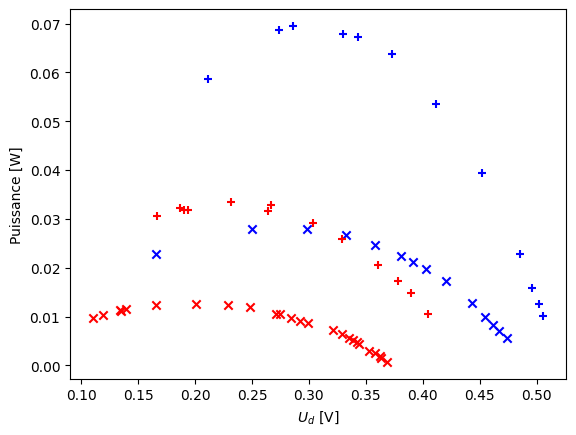

In [9]:
# Puissances
# [W] = [V] * [A]
puis_monod40 = monod40[:,1] * monod40[:,2] * 1e-3
puis_monod70 = monod70[:,1] * monod70[:,2] * 1e-3

plt.scatter(monod40[:,1], puis_monod40, marker="+", color=colors["M"], label="M, d = 40 cm")
plt.scatter(monod70[:,1], puis_monod70, marker="x", color=colors["M"], label="M, d = 70 cm")
# plt.title("$P(U_d)$, Cellule Monocristalline")

# Puissances
# [W] = [V] * [A]
puis_polyd40 = polyd40[:,1] * polyd40[:,2] * 1e-3
puis_polyd70 = polyd70[:,1] * polyd70[:,2] * 1e-3

plt.scatter(polyd40[:,1], puis_polyd40, marker="+", color=colors["P"], label="P, d = 40 cm")
plt.scatter(polyd70[:,1], puis_polyd70, marker="x", color=colors["P"], label="P, d = 70 cm")

plt.xlabel("$U_d$ [V]")
plt.ylabel("Puissance [W]")
tikz.save("../plots/Puisssance(U),MP.tikz")

### Efficacités